In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('Data2.xlsx')
df = df.rename(columns={"Altitude":"altitude"})
df = df.drop(['Latitude','Longitude'], axis=1)
print(df.shape)
df.head()

(58267, 2)


,SL,altitude
0,1,37
1,2,37
2,3,38
3,4,37
4,5,37


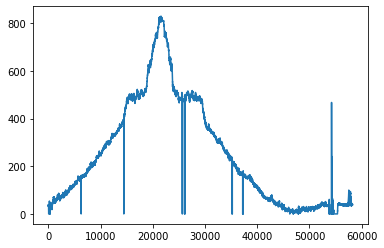

In [2]:
plt.plot(df['altitude'])

In [3]:
# df =  df[df['altitude'] > 0]
# df.shape[0] 

In [4]:
# plt.plot(df['altitude'])

In [5]:
def preprocess(data):
  data['SMA'] = data['altitude'].rolling(window=15).mean()
  data['diff'] = data['altitude'] - data['SMA']
  data=data.dropna()
  data_upper = data[data['diff'] > 50].index
  data_lower = data[data['diff'] < -50].index
  # print("Values Dropped: ", len(data_lower) + len(data_lower))
  data.drop(data_upper, inplace = True)
  data.drop(data_lower, inplace = True)
  # data.loc[data_upper,'altitude']=data.loc[data_upper-1, 'SMA']
  # data.loc[data_lower,'altitude']=data.loc[data_lower-1, 'SMA']
  plt.plot(data['altitude'])
  plt.show()
  # plt.plot(data['diff'])
  # plt.show()
  # print("Total Values in data: ", data.shape[0])
  return data



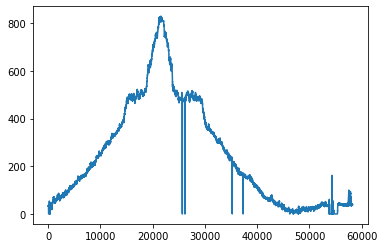

In [6]:
res1 = preprocess(df)

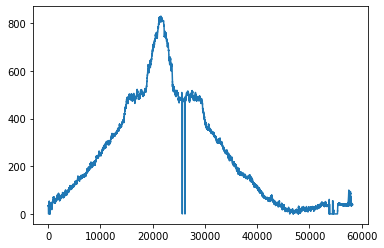

In [7]:
res2 = preprocess(res1)

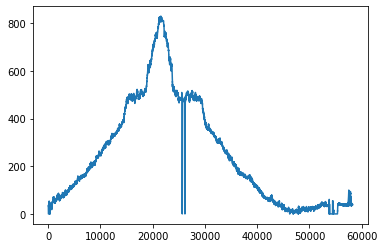

In [8]:
res3 = preprocess(res2)

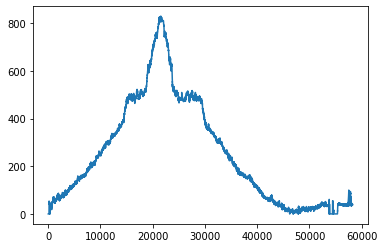

In [9]:
res4 = preprocess(res3)